additional pacakge needed: wordcloud, gensim, seaborn(?), PIL

# importing the dataframe

In [1]:
import pandas as pd
import numpy as np

In [9]:
sentences_df = pd.read_csv('../Comparison/final_eval_1.csv',index_col=0)

In [10]:
sentences_df.isnull().sum()

id                0
thread_title      0
reply_split       0
classification    0
dtype: int64

In [11]:
sentences_df = sentences_df.dropna()

In [12]:
sentences_df.head()

,id,thread_title,reply_split,classification
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",irrelevant
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Usually I have a Primorac Carbon and I'm offen...,irrelevant
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,comparative
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,comparative
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,descriptive


In [13]:
def assign_words(sentences_df,words,category):
    sentences_df.loc[sentences_df['reply_split'].str.lower().str.contains(words),category] = 1

In [14]:
assign_words(sentences_df,'spin|rotate','spin')
assign_words(sentences_df,'fast|speed|slow','speed')
assign_words(sentences_df,'hard|soft','hardness')
assign_words(sentences_df,'tack|grip|sticky','tackiness') #stiff not useful- usually stiff blades
assign_words(sentences_df,'control','control')
assign_words(sentences_df,'bounc','bounce')
assign_words(sentences_df,'arc|angle|throw|flat|high arc|high throw','throw')
assign_words(sentences_df,'durable|last long|long last','durability')
assign_words(sentences_df,'for block','blocking')
assign_words(sentences_df,'for loop','looping')

In [15]:
sentences_df.loc[sentences_df['reply_split'].str.lower().str.contains('Spin Spiel Ultima|backspin|T88 Ultra Spin|geospin|spinmax|topspin|underspin'),'spin'] = 0
sentences_df.loc[sentences_df['reply_split'].str.lower().str.contains('throw it|throw away'),'throw'] = 0

In [16]:
sentences_df.head()

,id,thread_title,reply_split,classification,spin,speed,hardness,tackiness,control,bounce,throw,durability,blocking,looping
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",irrelevant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Usually I have a Primorac Carbon and I'm offen...,irrelevant,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,comparative,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,comparative,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,descriptive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [20]:
sentences_df.head(20)

,id,thread_title,reply_split,classification,spin,speed,hardness,tackiness,control,bounce,throw,durability,blocking,looping
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",irrelevant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Usually I have a Primorac Carbon and I'm offen...,irrelevant,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,comparative,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,comparative,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,descriptive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,comparative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I bought recently the complete Garaydia family...,irrelevant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"With the ALC it is too soft and slow for me, w...",irrelevant,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I'm truly amazed about the huge difference bet...,irrelevant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,To finish I'm currently glueing a Dignics 05 o...,irrelevant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
sentences_df = sentences_df.fillna(0)

In [18]:
sentences_df.shape

(20488, 14)

In [19]:
sentences_df.sum()

id                5f686bc7b59794ca78c709025f686bc7b59794ca78c709...
thread_title      Tenergy 05FX vs Tenergy 64FXTenergy 05FX vs Te...
reply_split       Hi stao, the response of the T64fx changes dep...
classification    irrelevantirrelevantcomparativecomparativedesc...
spin                                                           1829
speed                                                          2544
hardness                                                       2278
tackiness                                                      1780
control                                                         841
bounce                                                          227
throw                                                           933
durability                                                      116
blocking                                                         34
looping                                                          82
dtype: object

In [225]:
def check_identification(aspect):
    aspects = sentences_df[sentences_df[aspect]==1].reply_split.values
    for line in aspects:
        print(line)

In [227]:
check_identification('looping')

However, Baracuda still has a medium-high throw so they're both perfectly fine for looping.
However, Baracuda still has a medium-high throw so they're both perfectly fine for looping.
However, Baracuda still has a medium-high throw so they're both perfectly fine for looping.
I personally felt EL-P was better for blocking and FX-P for looping.
I guess adding spin just require to work von it (like i said i was too hesitant for looping and always took the safety shot with my BH, thats why looping technique isnt good tho).
I have used both rubbers on BH and i prefer EL-S...much better than EL-P for looping, block, attacking both in short and awa from table
I'm starting to wonder if a 2nd template, with catagories of how good the rubber is for every stroke, would be useful?For example we can describe how the rubber performs for loops, blocks, hits, etc.
I mean, THIS rubber was great for looping, not so great for blocking, THAT rubber was rated 8.0 for blocking and only 3.0 for looping, etc.

In [228]:
sentences_df.head()

,id,thread_title,reply_split,spin,speed,hardness,tackiness,control,bounce,throw,durability,blocking,looping
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Usually I have a Primorac Carbon and I'm offen...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [229]:
sentences_df.to_csv('./roberta_eval_1_binary_aspects.csv')

spin	how many revolutions can a ball rotate	spinny, more spin, 
hardness	how thick the sponge sheet is, thicker sponge can generate more spin	soft
requirement	how much technical skills / force the player needs to play well with the rubber. some rubbers are so bouncy that you dont have to use much of your own force	
overall	general intuition which one you like	better, best, i like..., feel
tackiness	how sticky the top sheet is	tacky, more grip
speed 	how fast can the ball you return be 	faster, slower
control	how well can you leverage the rubbe to play your game 	touch
bounce	when you hit a ball, how much the ball rebounces..	Jo
throw	the arc of the angle of your return ball	high throw, lower throw, flat
durability	how long can you use a rubber before replacement	durable, last longer
"good for blocking"		
"good for looping"		

# Wordcloud

In [72]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# from wordcloud import STOPWORDS

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


def get_stopwords():
    # stop = set(STOPWORDS)
    stop = stopwords.words('english')
    custom_words_sen = 'really, like, way, much , still, but, find, need, you, many, lot, always, say, could, well, even, the'

    custom_words = custom_words_sen.split(', ')

    custom_stop = stop + custom_words
    return custom_stop

def preprocess_news(df,lowercase=False):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    stop = get_stopwords()
    for threads in df:
        if lowercase == True:
            words=[str.lower(w) for w in word_tokenize(threads) if (w not in stop)]
        else:
            words=[w for w in word_tokenize(threads) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

In [73]:
corpus_normal =preprocess_news(sentences_df['reply_split'], lowercase = False)
corpus_lowercase =preprocess_news(sentences_df['reply_split'], lowercase = True)

In [74]:
# https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
# code modified from blog above for customizing wordcloud

mask = np.array(Image.open('./imgs/ping_pong_paddle_2.jpg'))

custom_stop = get_stopwords()

# red color scheme
import random

def show_wordcloud_custom_shape(data,n_max_words=100,color_scheme = 'red' ,img_mask = mask):
    
    def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
        if color_scheme == 'red':
            h = 0 # 0 - 360
            s = 100 # 0 - 100
        elif color_scheme == 'black':
            h = 0
            s = 0
            
        l = random.randint(30, 80) # 0 - 100
        return "hsl({}, {}%, {}%)".format(h, s, l)

    if len(img_mask) == 0:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop, #stopwords = set(STOPWORDS)
            max_words=n_max_words,
            max_font_size=30,
            scale=3,
            random_state=1)
    else:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    


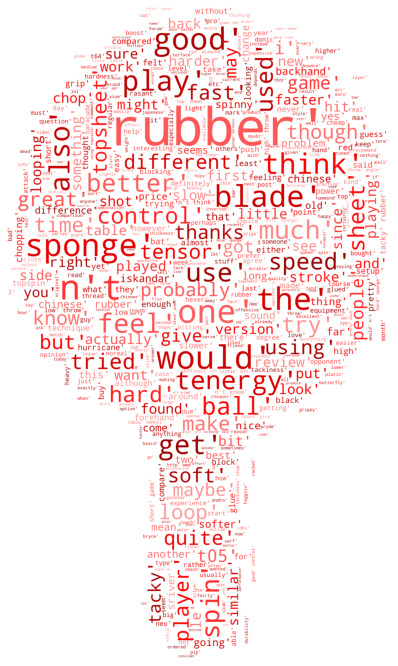

In [75]:
show_wordcloud_custom_shape(corpus_lowercase,500)

# Compare two brands

In [76]:
sentences_df.head()

,id,thread_title,reply_split
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep..."
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Usually I have a Primorac Carbon and I'm offen...
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.


In [81]:
tenegy_replies = sentences_df[sentences_df.thread_title.str.lower().str.contains('tenergy')].reply_split

In [82]:
baracuda_replies = sentences_df[sentences_df.thread_title.str.lower().str.contains('baracuda')].reply_split

In [83]:
baracuda_replies[baracuda_replies.str.lower().str.contains('fast')]

240      Tenergy is noticeably faster than Baracuda, th...
274      Tenergy is noticeably faster than Baracuda, th...
308      Tenergy is noticeably faster than Baracuda, th...
927      G1 is definitely faster than Baracuda, pretty ...
933      is it easier with the fastarc due to the amoun...
935      I tend to be aggressive when opening up off ba...
938        The main difference is that G1 is a bit faster.
972                 The Fastarc G-1 is an absolute oddity.
974      Unlike the others that started with a bang and...
2135     But the rubber is not that fast and is a littl...
3661     It was a bit fast for me but I could off and o...
5685         It is almost as fast and as spinny as the 64.
5698     Hexer is harder and faster and pretty much bet...
5714     I think many people dismissed this rubber as s...
5716     Coming from mainly Chinese rubbers, I've used ...
10505    It may have been nice (but still different to ...
10514    I switched to a faster blade and faster rubber.

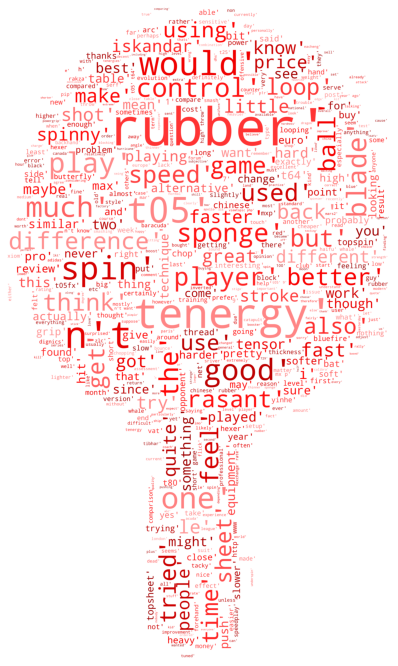

In [84]:
# https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
# code modified from blog above for customizing wordcloud

corpus_tenegy =preprocess_news(tenegy_replies, lowercase = True)
show_wordcloud_custom_shape(corpus_tenegy,500,'red')

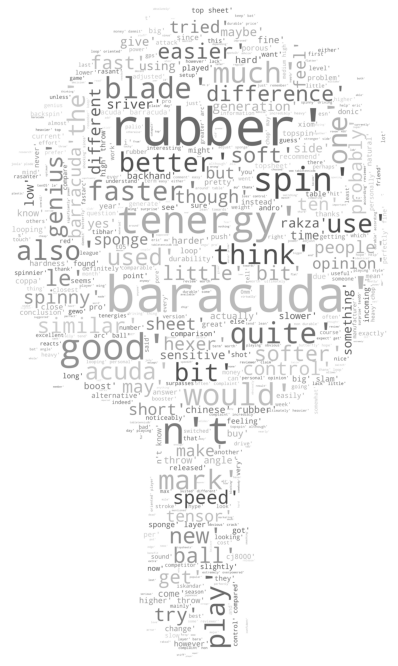

In [85]:
corpus_baracuda =preprocess_news(baracuda_replies, lowercase = True)
show_wordcloud_custom_shape(corpus_baracuda,500,'black')

- spin	-how many revolutions can a ball rotate	spinny, more spin, 
- hardness	-how thick the sponge sheet is, thicker sponge can generate more spin	soft
- requirement	-how much technical skills / force the player needs to play well with the rubber. some rubbers are so bouncy that you dont have to use much of your own force	
- overall	-general intuition which one you like	better, best, i like..., feel
- tackiness-	how sticky the top sheet is	tacky, more grip
- speed -	how fast can the ball you return be 	faster, slower
- control	-how well can you leverage the rubbe to play your game 	touch
- bounce	-when you hit a ball, how much the ball rebounces..	Jo
- throw	-the arc of the angle of your return ball	high throw, lower throw, flat
- durability	-how long can you use a rubber before replacement	durable, last longer
- "good for blocking"		
- "good for looping"		

In [212]:
def find_words_contain(df,word):
    return df['reply_split'][df['reply_split'].str.lower().str.contains(word)]

In [213]:
print(find_words_contain(sentences_df,'spin').values)

["Usually I have a Primorac Carbon and I'm offensive player with agressive top spin."
 'On the other hand less spin too.'
 "after a training I'll see if it fits for me or if I have to test it with the garaydia T5000 or Garaydia ZLC as I'm seeking more spin..."
 ...
 'I think globe is faster but not by a mile also got better control,the geospin has more spin but the rubber feels a bit dead to me'
 "I tried Geospin tacky on a friend's racket about a week ago."
 'Further to Falcoing the Geospin Rubber, the dome did not do a whole lot more even after 2 coats...and I am letting the glue dry naturally this time around....so perhaps I have got all of the stretching that is possible out of the Geospin after previously using Ecolo about 3 weeks ago...Learning a little bit more every day...fosss']


# others

In [65]:
tag_lists = ['NN','IN','NNP','JJ','RB','DT','PRP','VBZ','JJR','JJS','RBR','RBS']

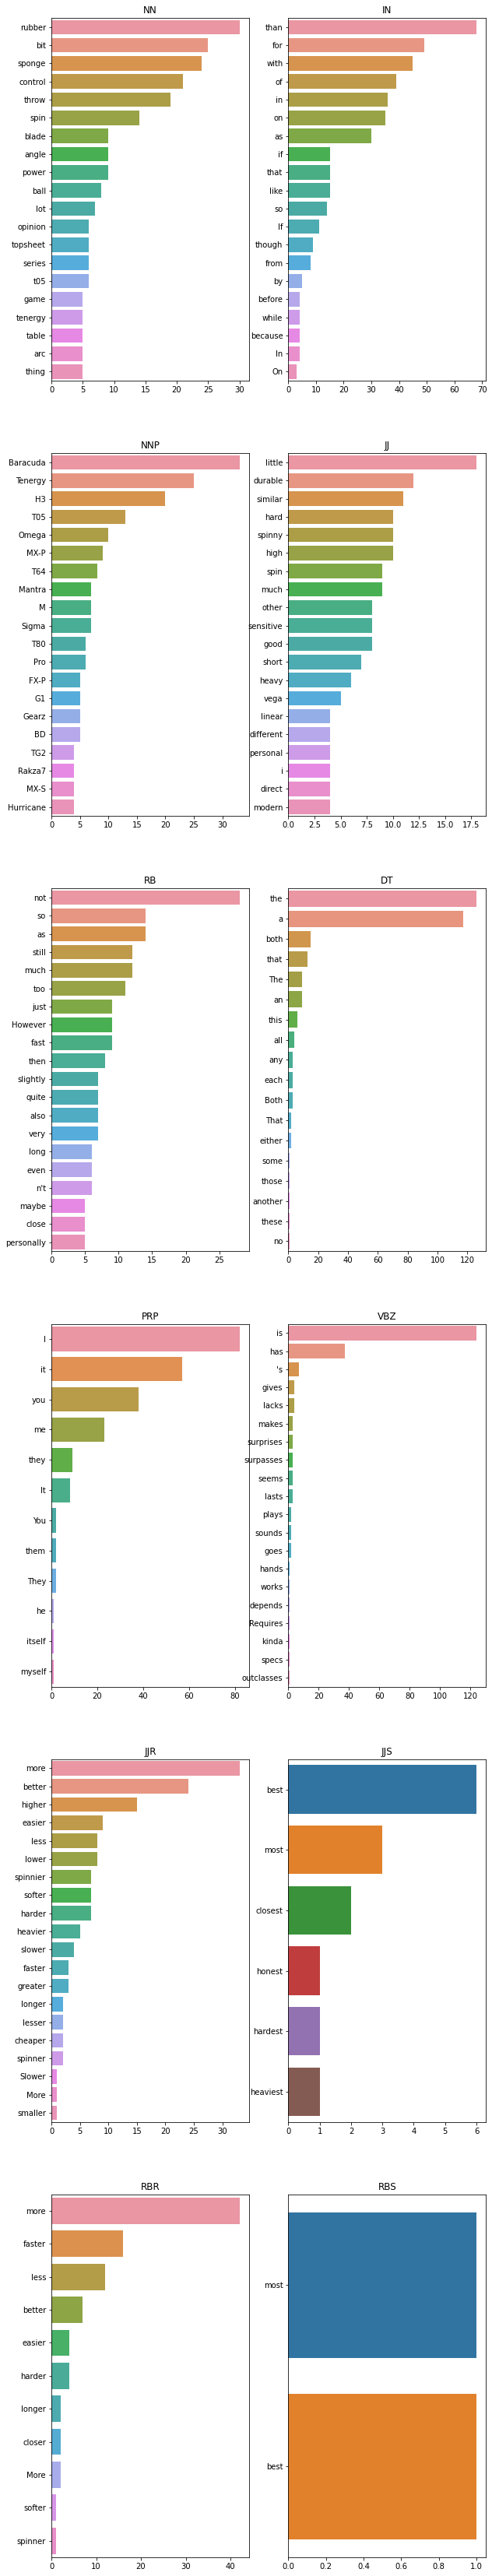

In [66]:
f, axes = plt.subplots(6, 2,figsize=(10,60))
for idx,tagged in enumerate(tag_lists):

    plot_top_tagged(comp_sentences_df['reply_split'],tagged=tagged,i=idx)

In [67]:
#  RBR is useful, JJR also useful

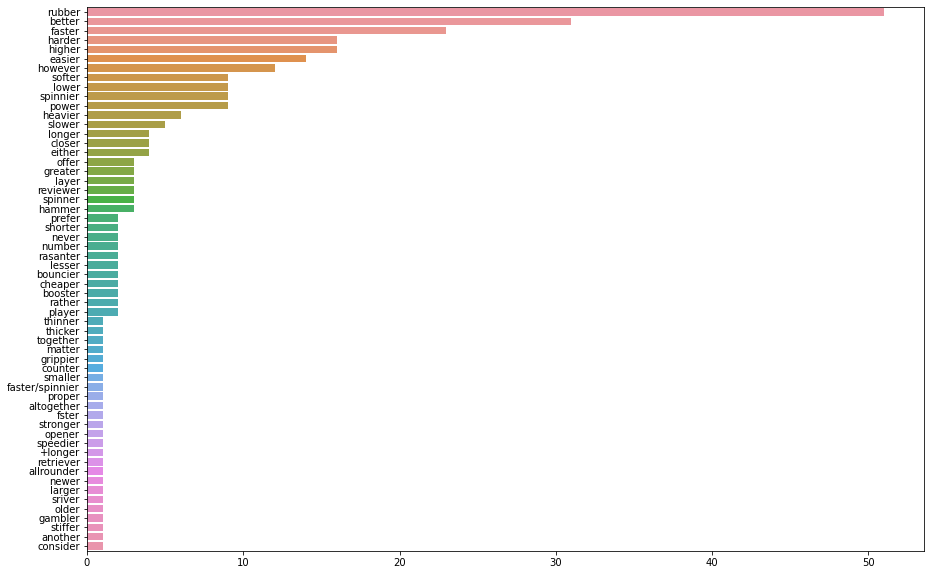

In [70]:
# looking at the top word that is NOT a stopword

from collections import Counter
import seaborn as sns

counter=Counter(er_list)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in custom_stop):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(15,10))
ax = sns.barplot(x=y,y=x)

* speed : faster, spinnier (has more spin, has less spin), slower, spiny
* throw angle / arc: higher, lower
* hardness: softer, harder, stiffer
* texture: thinner, thicker, bouncy, bouncier
* price: cheaper
* durability: more durable

* other words: throw, flex, flick, flat, springy, chopping